In [2]:
import os
import caesar
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import modules as anal
import modules.anal_func as anal_func

from astropy.cosmology import LambdaCDM
import astropy.units as u
from astropy.io import fits
from scipy import interpolate

from modules.powdermod.makesed import MakeSED

import yt

cosmo = LambdaCDM(H0 = 68, Om0= 0.3, Ode0= 0.7, Ob0=0.048)
plt.rcParams.update({'font.size': 28})

sb = anal.Simba('PC39BP4', size=100)

In [3]:
subset = '/home/lorenzong/analize_simba_cgm/output/hdf5/filtered_files/snap_129/subset_000000.h5'
ds = yt.load(subset)

yt : [INFO     ] 2024-08-21 16:24:18,057 Calculating time from 7.114e-01 to be 2.969e+17 seconds
yt : [INFO     ] 2024-08-21 16:24:18,058 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2024-08-21 16:24:18,094 Parameters: current_time              = 2.968791388457766e+17 s
yt : [INFO     ] 2024-08-21 16:24:18,094 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-08-21 16:24:18,095 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-08-21 16:24:18,095 Parameters: domain_right_edge         = [25000. 25000. 25000.]
yt : [INFO     ] 2024-08-21 16:24:18,096 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2024-08-21 16:24:18,096 Parameters: current_redshift          = 0.4057579856290421
yt : [INFO     ] 2024-08-21 16:24:18,096 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2024-08-21 16:24:18,096 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2024-08-21 16:24:18,096 Parameters: omega_radiation     

yt : [INFO     ] 2024-08-21 16:24:18,109 Allocating for 1.312e+06 particles
Initializing coarse index : 100%|████████████████████████████████████| 5/5 [00:00<00:00, 144.01it/s]
yt : [INFO     ] 2024-08-21 16:24:18,146 Updating index_order2 from 2 to 4
Initializing refined index: 100%|█████████████████████████████████████| 5/5 [00:00<00:00, 48.74it/s]
yt : [INFO     ] 2024-08-21 16:24:18,549 xlim = 0.000000 25000.000000
yt : [INFO     ] 2024-08-21 16:24:18,549 ylim = 0.000000 25000.000000
yt : [INFO     ] 2024-08-21 16:24:18,550 xlim = 0.000000 25000.000000
yt : [INFO     ] 2024-08-21 16:24:18,550 ylim = 0.000000 25000.000000
yt : [INFO     ] 2024-08-21 16:24:18,561 Making a fixed resolution buffer of (('PartType0', 'Density')) 800 by 800



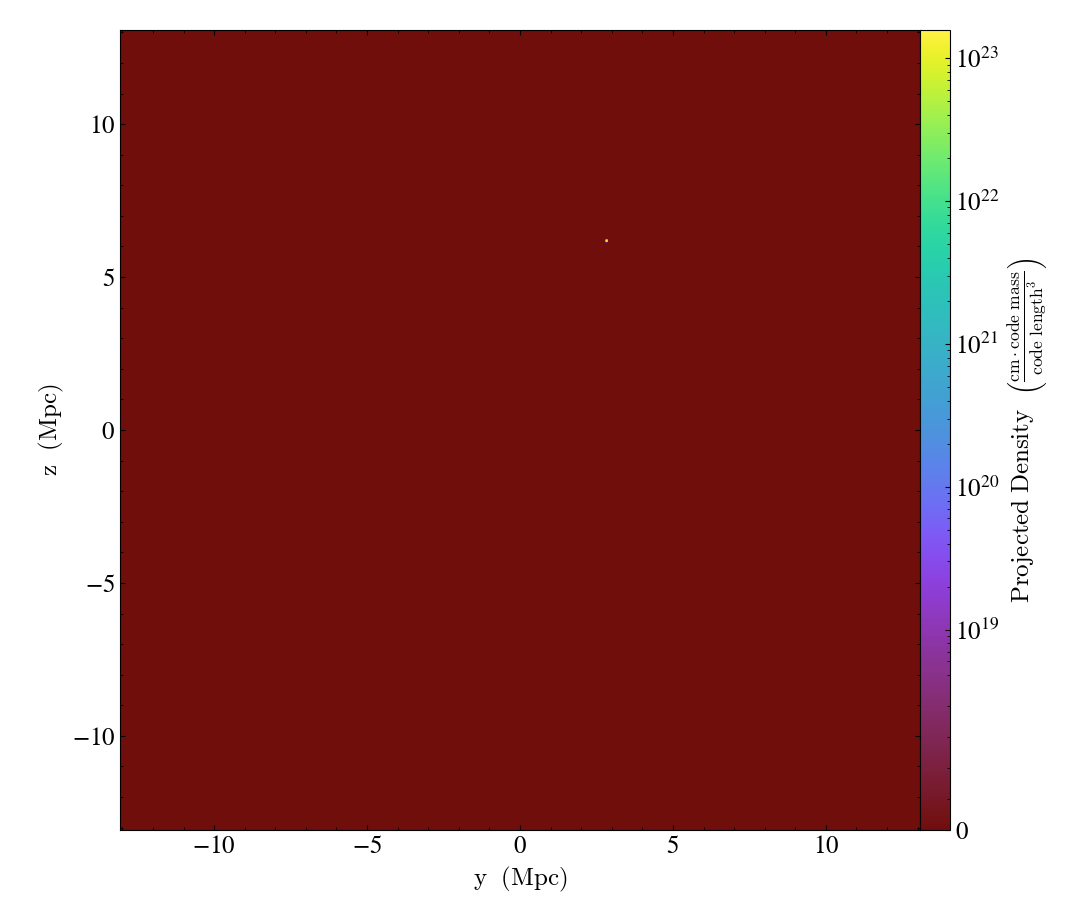

In [4]:
#print(ds.field_list)
p = yt.ProjectionPlot(ds, "x", ("PartType0", "Density"))
#p.pan_rel((0.109,0.237))
#v, c = ds.find_max(("PartType0", "Masses"))
#p.set_center((c[0], c[1]))
#p.zoom(190)
#gsfr = readsnap('/home/lorenzong/Desktop/simba_cgm/filtered_snaps/snap_129/subset_000000.h5','sfr','gas',units=1)
p.show()

In [9]:
ds.parameters['octree'][('PartType0', 'Masses')] * ds.parameters['octree'][('PartType0', 'metallicity')]

KeyError: 'octree'

In [14]:
ds.parameters.keys()

dict_keys(['BoxSize', 'Flag_Cooling', 'Flag_DoublePrecision', 'Flag_Feedback', 'Flag_IC_Info', 'Flag_Metals', 'Flag_Sfr', 'Flag_StellarAge', 'HubbleParam', 'MassTable', 'NumFilesPerSnapshot', 'NumPart_ThisFile', 'NumPart_Total', 'NumPart_Total_HighWord', 'Omega0', 'OmegaLambda', 'Redshift', 'Time', 'NumFiles', 'Massarr'])

In [19]:
sb2 = anal.Simba(size=25)
mset = sb2.get_sim_file(129)
ds = yt.load(mset)
ds.parameters.keys()

yt : [INFO     ] 2024-08-21 12:07:26,508 Calculating time from 7.114e-01 to be 2.969e+17 seconds
yt : [INFO     ] 2024-08-21 12:07:26,509 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2024-08-21 12:07:26,534 Parameters: current_time              = 2.968791388457766e+17 s
yt : [INFO     ] 2024-08-21 12:07:26,535 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-08-21 12:07:26,535 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-08-21 12:07:26,536 Parameters: domain_right_edge         = [25000. 25000. 25000.]
yt : [INFO     ] 2024-08-21 12:07:26,536 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2024-08-21 12:07:26,536 Parameters: current_redshift          = 0.4057579856290421
yt : [INFO     ] 2024-08-21 12:07:26,536 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2024-08-21 12:07:26,537 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2024-08-21 12:07:26,537 Parameters: omega_radiation     

dict_keys(['BoxSize', 'Flag_Cooling', 'Flag_DoublePrecision', 'Flag_Feedback', 'Flag_IC_Info', 'Flag_Metals', 'Flag_Sfr', 'Flag_StellarAge', 'HubbleParam', 'MassTable', 'NumFilesPerSnapshot', 'NumPart_ThisFile', 'NumPart_Total', 'NumPart_Total_HighWord', 'Omega0', 'OmegaLambda', 'Redshift', 'Time', 'NumFiles', 'Massarr'])